In [37]:
import sys
import numpy as np
sys.path.append("../../scripts/")
from plt_config import use_latex, TU_GREY, TU_RED
import matplotlib.pyplot as plt
use_latex()
data_folder = "plot_data"
model_name = "MGNN_6-31G_NO_AUG_07_07_manual_ref"
font_size = 16

# Initial loss for first training without data augmentation

In [38]:
import pickle, os
with open(os.path.join(data_folder, f"{model_name}.history"), "rb") as f: 
    history = pickle.load(f)

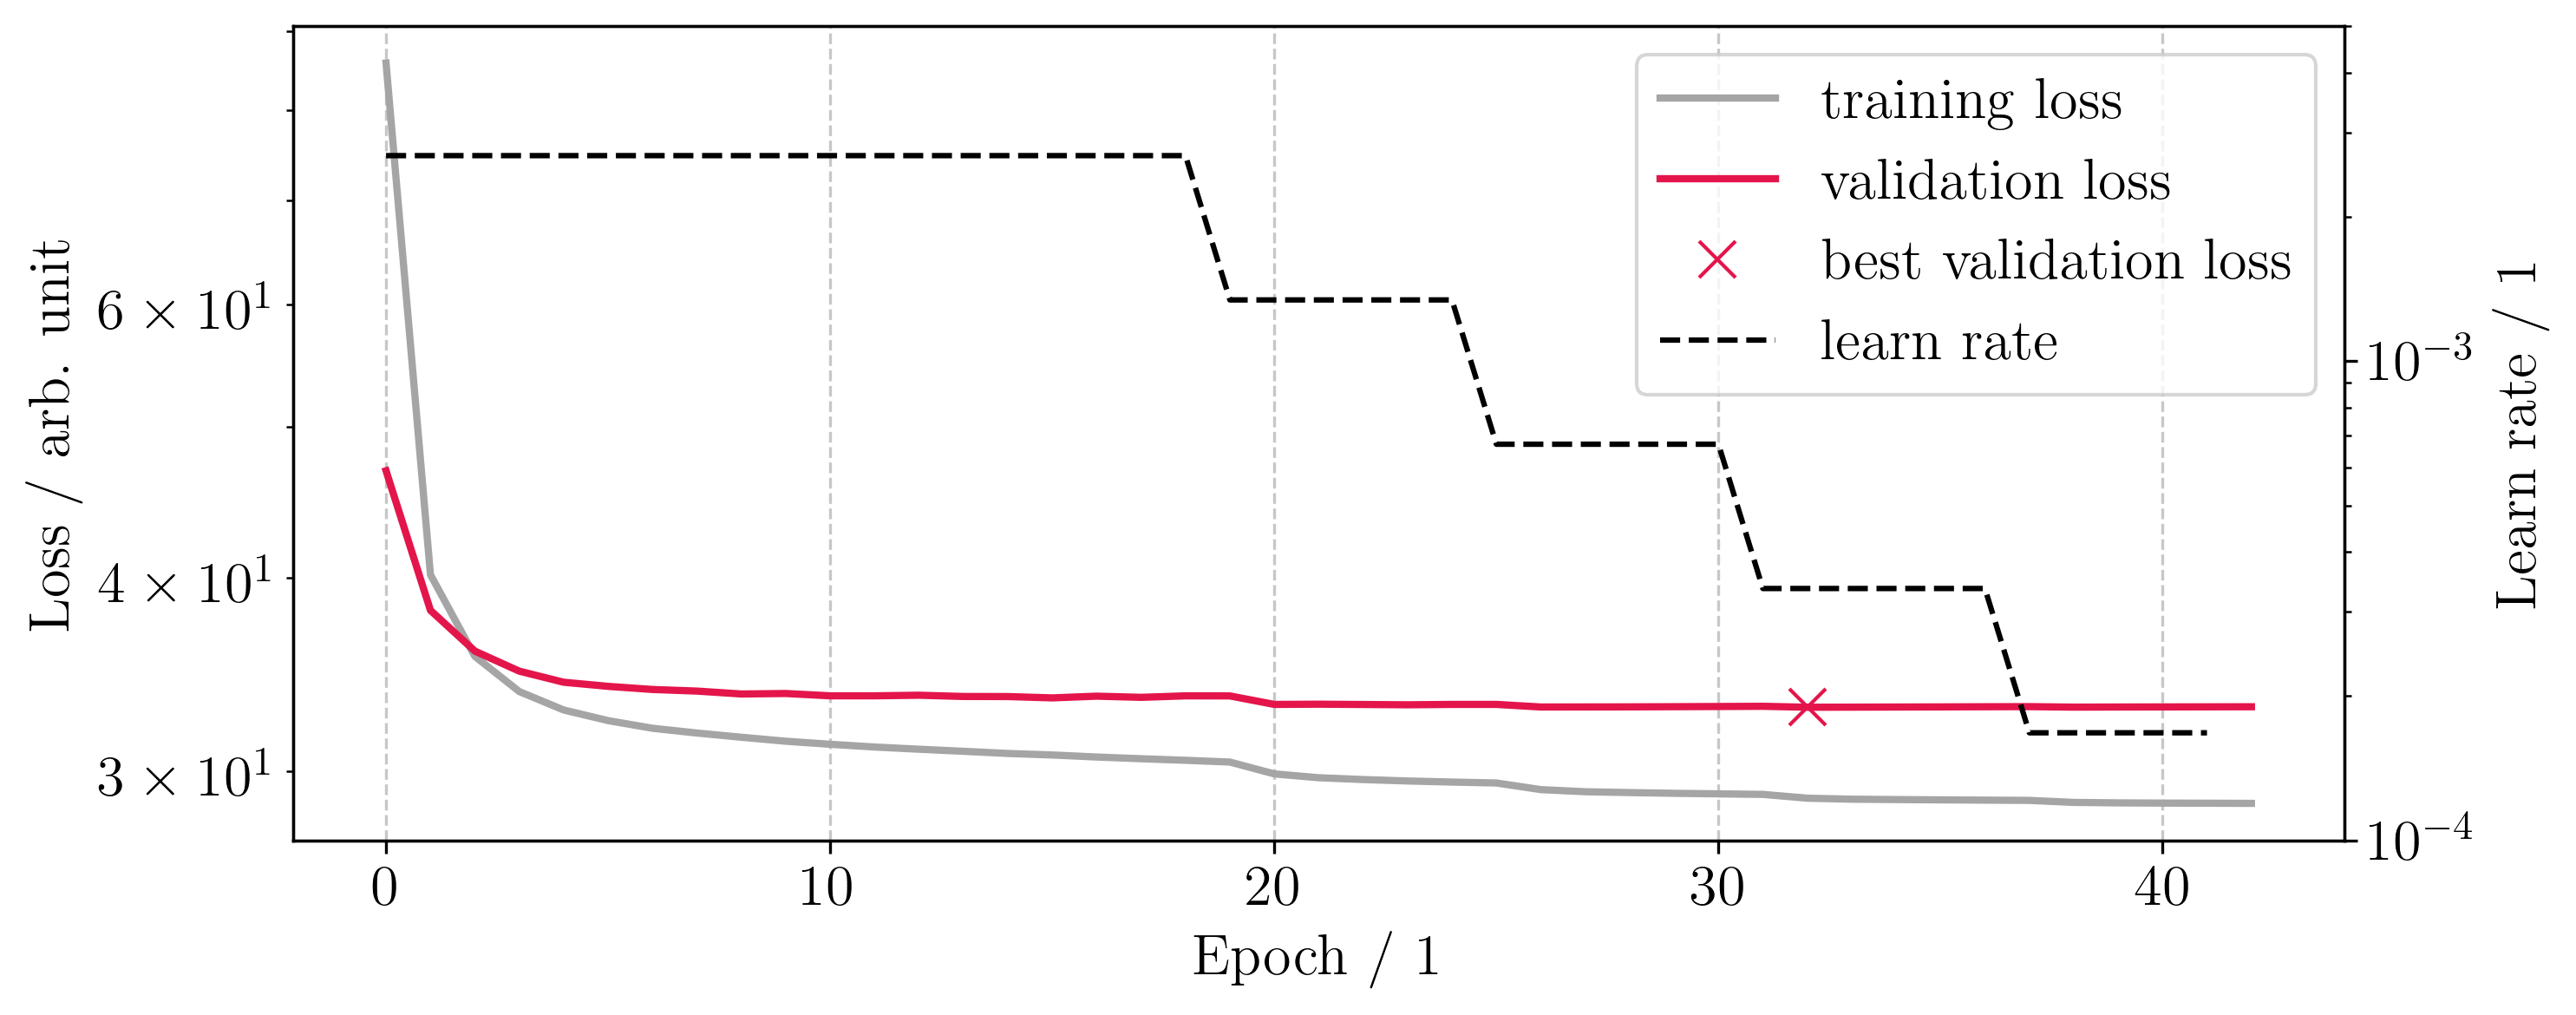

In [40]:
tr_loss = history["train_loss"]
val_loss = history["val_loss"]
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(tr_loss, label="training loss", color=TU_GREY, linewidth=2)
ax.plot(val_loss, label="validation loss", color=TU_RED, linewidth=2)
ax.set_xlabel("Epoch / 1", fontsize=font_size)
ax.set_ylabel("Loss / arb. unit", fontsize=font_size)
ax.set_yscale("log")
ax.grid(True, linestyle='--', alpha=0.7)
best_val = np.argmin(val_loss)
ax.plot(best_val, val_loss[best_val], marker="x", markersize=10, color=TU_RED, label="best validation loss", linestyle="None")

ax2 = ax.twinx()
ax2.plot(history["lr"], label="learn rate", color="black", linestyle='--', linewidth=1.5)
ax2.set_ylabel("Learn rate / 1", fontsize=font_size)
ax2.set_yscale("log")
ax2.set_ylim(1e-4, 5*1e-3)
ax2.tick_params(axis='y')
ax2.grid(False)

# Combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, fontsize=font_size, loc='upper right')

plt.tight_layout()
plt.savefig(f"../../fig/gnn/{model_name}_train_val_loss.pdf", bbox_inches='tight')